# Examples of signals included in the SignalBank

In [1]:
import numpy as np
from numpy import pi as pi
import pandas as pd
import scipy.signal as sg
import seaborn as sns
import matplotlib.pyplot as plt
from src.utilities.utilstf import *
from mcsm_benchmarks.SignalBank import SignalBank
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

In [3]:
N = 2**10
signal_bank = SignalBank(N=N)
fmin = signal_bank.fmin
fmax = signal_bank.fmax
tmin = signal_bank.tmin
tmax = signal_bank.tmax

/home/juan/Nextcloud/Miramont_Juan/python_code/benchmark-test/.venv/lib/python3.10/site-packages/mcsm_benchmarks/SignalBank.py:1174: RuntimeWarning: divide by zero encountered in divide
  e = np.exp(-alfa*np.arange(tt))*((np.arange(tt)-c)**2/np.arange(tt))
/home/juan/Nextcloud/Miramont_Juan/python_code/benchmark-test/.venv/lib/python3.10/site-packages/mcsm_benchmarks/SignalBank.py:1362: RuntimeWarning: divide by zero encountered in divide
  e = np.exp(-alfa*np.arange(tt))*((np.arange(tt)-c)**2/np.arange(tt))


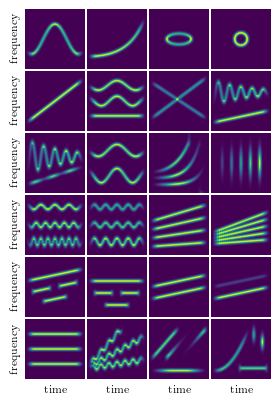

In [4]:
signals_dic = signal_bank.signalDict
number_of_signals = len(signals_dic.keys())
# nplots = int(np.ceil(np.sqrt(number_of_signals)))
# print(nplots)
signals = [signals_dic[llave]() for llave in signals_dic]


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig = plt.figure()
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                nrows_ncols=(6,4),  # creates 2x2 grid of axes
                axes_pad=0.025,  # pad between axes in inch.
                )

for signal, ax in zip(signals, grid):
    S, stft = get_spectrogram(signal,)
    stft = stft[0:N+1,:]
    # print(idx)
    ax.imshow(np.abs(stft), origin = 'lower')
    ax.set_xticks([],[])
    ax.set_xlabel('time', fontsize = '8')
    ax.set_yticks([])
    ax.set_ylabel('frequency', fontsize = '8')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

plt.show()
# fig.set_size_inches((3.5,1))
set_size(3.5,5, ax=fig)
fig.savefig('figures/figure_signals_example.pdf',dpi=900, transparent=False,bbox_inches='tight')